# TP 1 : Analyse Exploratoire & Prétraitement  
## Breast Cancer Dataset

---

## Description du TP

**Objectif :**  
Réaliser une analyse exploratoire complète (EDA) et préparer les données pour la phase de modélisation.

---

##  Dataset

- **Nom :** Breast Cancer Wisconsin (Diagnostic)
- **Taille :** 569 échantillons, 32 variables
- **Variable cible :** `Diagnosis`
  - `M` : Malignant
  - `B` : Benign

---

## 🔬 Caractéristiques des données

Le dataset est composé de :
- **10 mesures cellulaires de base**, telles que :
  - Radius
  - Texture
  - Perimeter
  - Area
  - Smoothness
  - Compactness
  - Concavity
  - Concave points
  - Symmetry
  - Fractal dimension

- **Statistiques associées** pour chaque mesure :
  - `mean` : valeur moyenne
  - `se` : erreur standard
  - `worst` : valeur maximale observée

---

## 🎯 Instructions du TP



 *À la fin de ce TP, les données devront être propres, analysées et prêtes pour l’entraînement d’un modèle de machine learning.*


In [1]:
# 1. Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 2. Chargement des données
df = pd.read_csv('breast-cancer.csv')

# Questions :
# a) Afficher les 5 premières lignes et les informations du dataset
# b) Quelle est la forme du dataset ? (lignes × colonnes)
# c) Quels sont les types de données de chaque colonne ?
# d) Y a-t-il des valeurs manquantes ? Si oui, combien et où ?
# e) Quelle est la distribution de la variable cible (diagnosis) ?

# 3. Nettoyage initial
# a) Supprimer la colonne 'id' si elle existe
# b) Encoder la variable cible : M → 1 (malin), B → 0 (bénin)
# c) Vérifier les doublons et les supprimer si nécessaire

In [2]:
# Questions :
# a) Afficher les 5 premières lignes et les informations du dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# b) Quelle est la forme du dataset ? (lignes × colonnes)
print(f"la forme du dataset est : {df.shape}")
# c) Quels sont les types de données de chaque colonne ?
df.dtypes

la forme du dataset est : (569, 32)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
# d) Y a-t-il des valeurs manquantes ? Si oui, combien et où ?
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Text(0.5, 1.0, 'Distribution de la variable cible (diagnosis)')

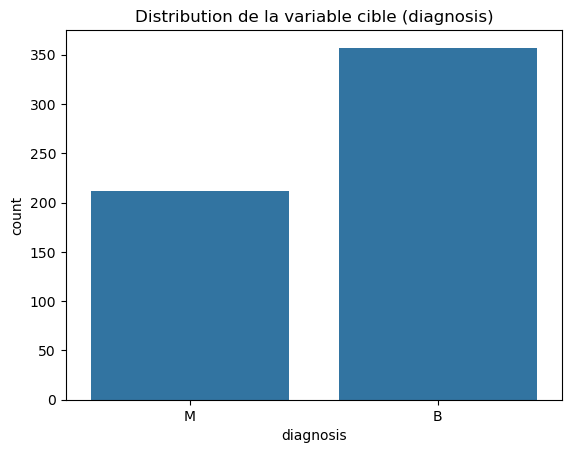

In [7]:
# e) Quelle est la distribution de la variable cible (diagnosis) ?
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution de la variable cible (diagnosis)')

In [8]:
# 3. Nettoyage initial
# a) Supprimer la colonne 'id' si elle existe
df.drop(columns=["id"], axis=1, inplace=True)
# b) Encoder la variable cible : M → 1 (malin), B → 0 (bénin)
df.diagnosis = df.diagnosis.replace({'M': 1, 'B': 0})

In [9]:
# c) Vérifier les doublons et les supprimer si nécessaire
#df.duplicates.sum()
df.drop_duplicates(inplace=True)

# Partie 2 : Analyse Exploratoire Complète

In [10]:
# 4. Analyse statistique descriptive
# a) Calculer les statistiques descriptives (mean, std, min, max, quartiles)
# b) Identifier les features avec la plus grande variance
# c) Calculer le skewness (asymétrie) de chaque feature numérique

# 5. Visualisations univariées
# a) Histogrammes de 6 features importantes avec KDE
# b) Boxplots pour détecter les outliers
# c) Distribution de la variable cible (pie chart + barplot)

# 6. Relations bivariées
# a) Matrice de corrélation (heatmap)
# b) Top 10 des features les plus corrélées avec le diagnostic
# c) Scatterplots des 3 paires de features les plus corrélées

# 7. Analyse par classe (M vs B)
# a) Boxplots comparatifs pour les 5 features les plus discriminantes
# b) T-tests pour vérifier les différences significatives entre classes
# c) Moyennes et écarts-types par classe

In [11]:
# 4. Analyse statistique descriptive
# a) Calculer les statistiques descriptives (mean, std, min, max, quartiles)
desc_stats = df.describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [12]:
# b) Identifier les features avec la plus grande variance
variances = df.drop(columns="diagnosis", axis=1).var().sort_values(ascending=False)

top_variance_features = variances.head(10)

top_variance_features


area_worst         324167.385102
area_mean          123843.554318
area_se              2069.431583
perimeter_worst      1129.130847
perimeter_mean        590.440480
texture_worst          37.776483
radius_worst           23.360224
texture_mean           18.498909
radius_mean            12.418920
perimeter_se            4.087896
dtype: float64

In [13]:
from scipy.stats import skew

# c) Calculer le skewness (asymétrie) de chaque feature numérique
skewness = df.drop(columns="diagnosis", axis=1).apply(skew).sort_values(ascending=False)

skewness

area_se                    5.432816
concavity_se               5.096981
fractal_dimension_se       3.913617
perimeter_se               3.434530
radius_se                  3.080464
smoothness_se              2.308344
symmetry_se                2.189342
compactness_se             1.897202
area_worst                 1.854468
fractal_dimension_worst    1.658193
texture_se                 1.642100
area_mean                  1.641391
compactness_worst          1.469667
concave points_se          1.440867
symmetry_worst             1.430145
concavity_mean             1.397483
fractal_dimension_mean     1.301047
compactness_mean           1.186983
concave points_mean        1.168090
concavity_worst            1.147202
perimeter_worst            1.125188
radius_worst               1.100205
perimeter_mean             0.988037
radius_mean                0.939893
symmetry_mean              0.723695
texture_mean               0.648734
texture_worst              0.497007
concave points_worst       0

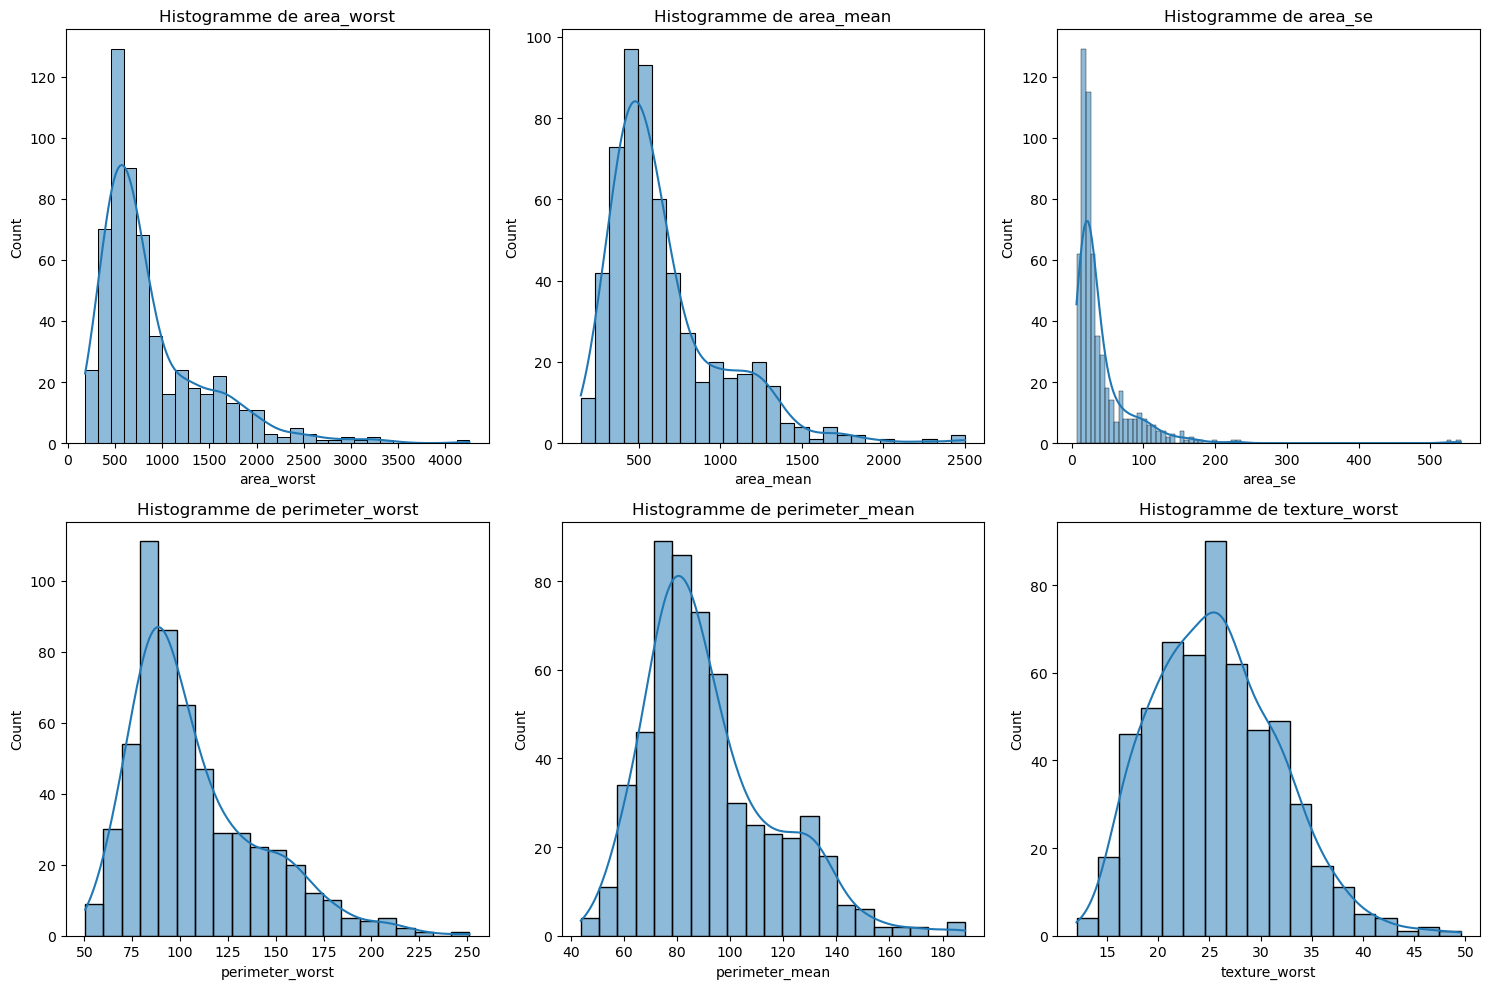

In [14]:
# 5. Visualisations univariées
# a) Histogrammes de 6 features importantes avec KDE
important_features = top_variance_features.index[:6]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3,i+1)
    sns.histplot(df[feature], kde = True)
    plt.title(f'Histogramme de {feature}')
    
plt.tight_layout()
plt.show()

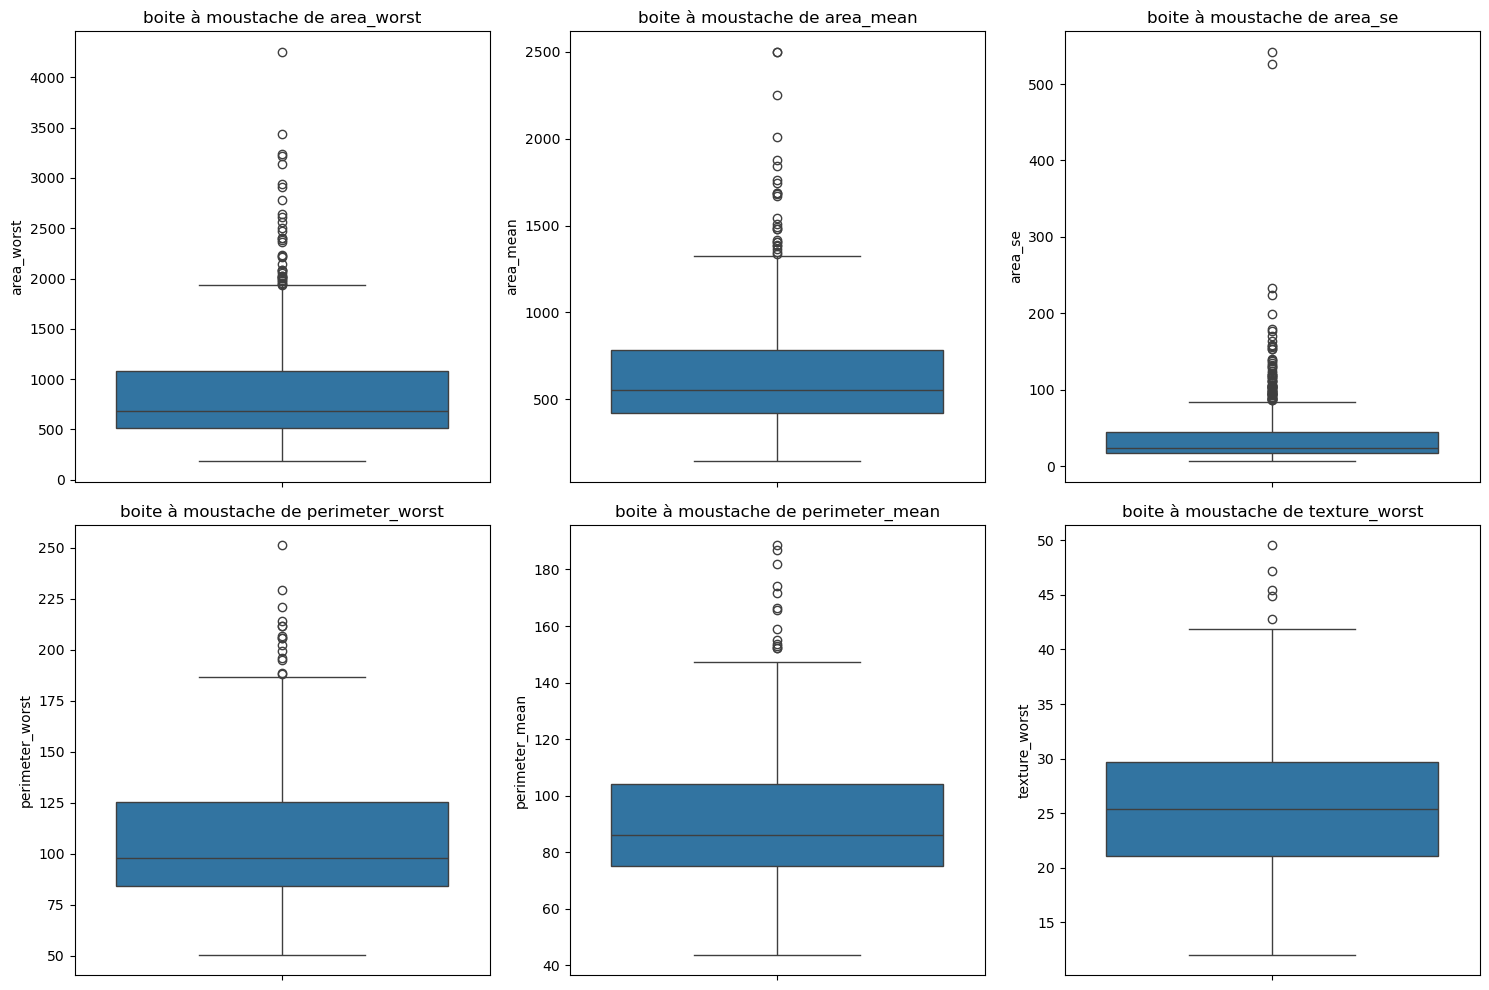

In [15]:
# b) Boxplots pour détecter les outliers
important_features = top_variance_features.index[:6]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3,i+1)
    sns.boxplot(df[feature])
    plt.title(f'boite à moustache de {feature}')
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Répartition des classes de diagnosis')

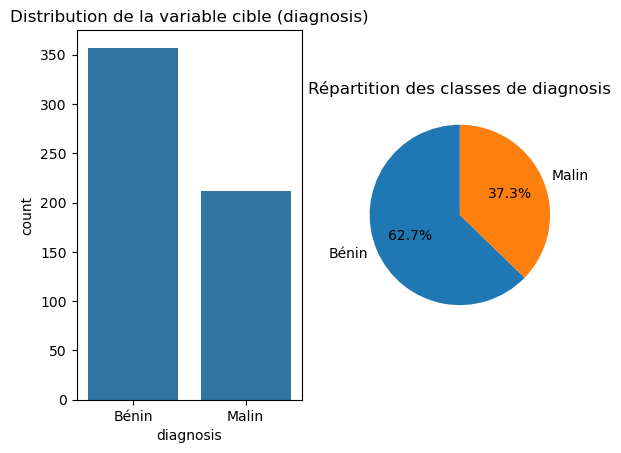

In [16]:
# c) Distribution de la variable cible (pie chart + barplot)
plt.subplot(1,2,1)
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution de la variable cible (diagnosis)')
plt.xticks([0,1], ['Bénin', 'Malin'])

# pie chart
plt.subplot(1,2,2)
df.diagnosis.value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Bénin', 'Malin'],
    startangle=90
)
plt.ylabel('')
plt.title('Répartition des classes de diagnosis')


Text(0.5, 1.0, 'Matrice de corrélation des features')

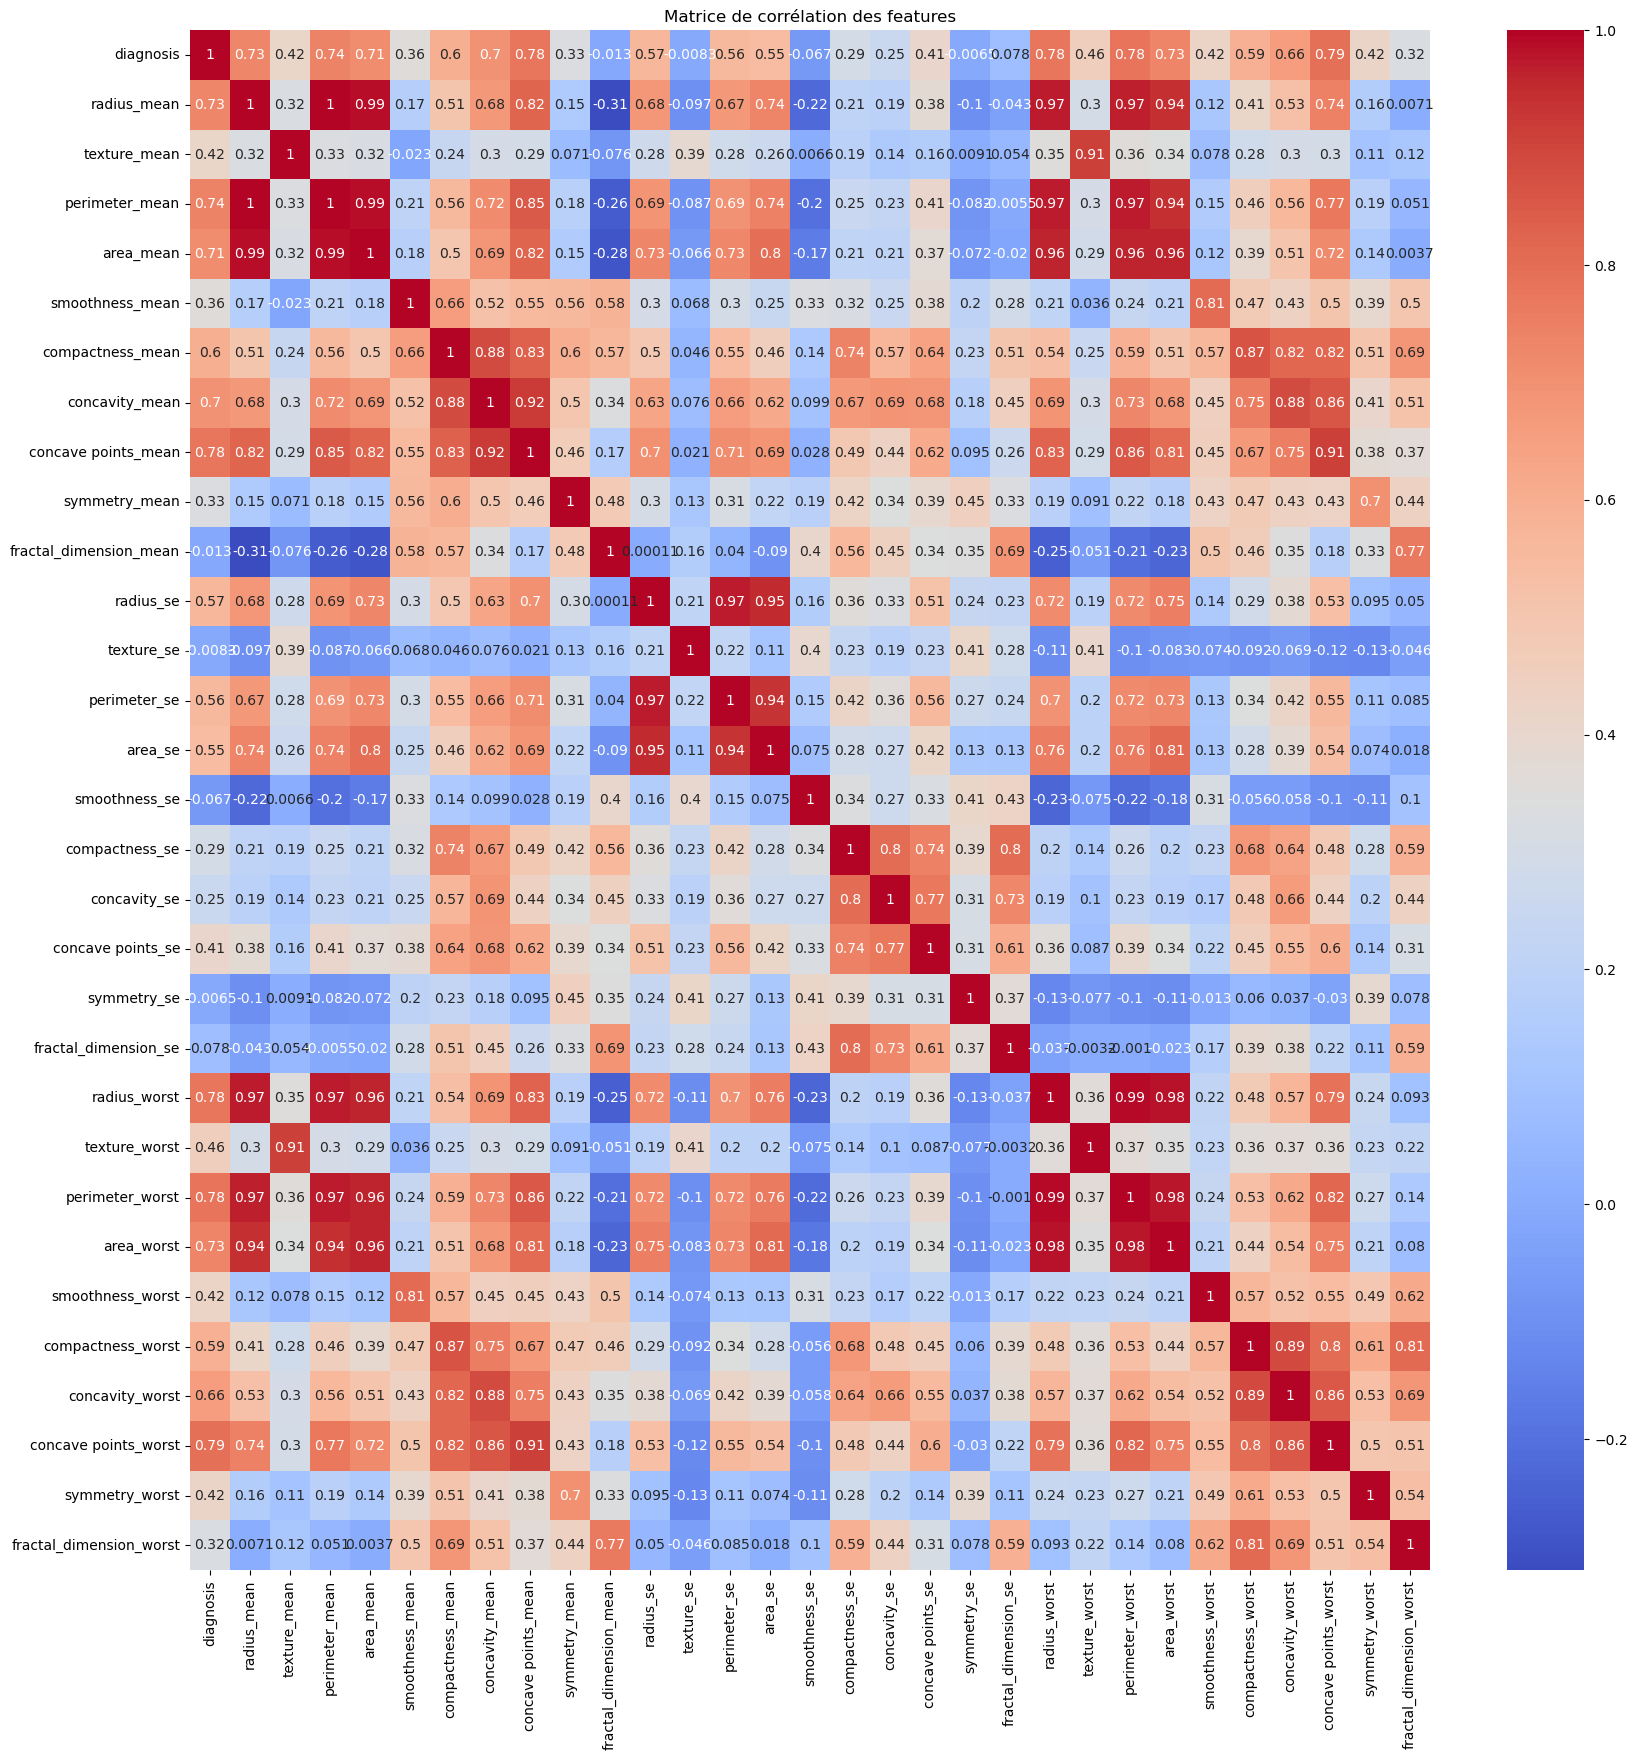

In [17]:

# 6. Relations bivariées
# a) Matrice de corrélation (heatmap)
cor = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des features')

In [18]:

# b) Top 10 des features les plus corrélées avec le diagnostic
corr_target = cor['diagnosis'].drop('diagnosis').abs().sort_values(ascending=False)

top_10_corr_features = corr_target.head(10)
top_10_corr_features

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

In [19]:

# c) Scatterplots des 3 paires de features les plus corrélées
feature_cor = cor.drop('diagnosis', axis=1).drop('diagnosis', axis=0)

cor_pairs = (
    feature_cor.abs()
    .unstack()
    .sort_values(ascending=False)
)

#suppression des doublons
cor_pairs = cor_pairs[cor_pairs < 1]
top_pairs = cor_pairs.head(3)

top_pairs

radius_mean      perimeter_mean    0.997855
perimeter_mean   radius_mean       0.997855
perimeter_worst  radius_worst      0.993708
dtype: float64

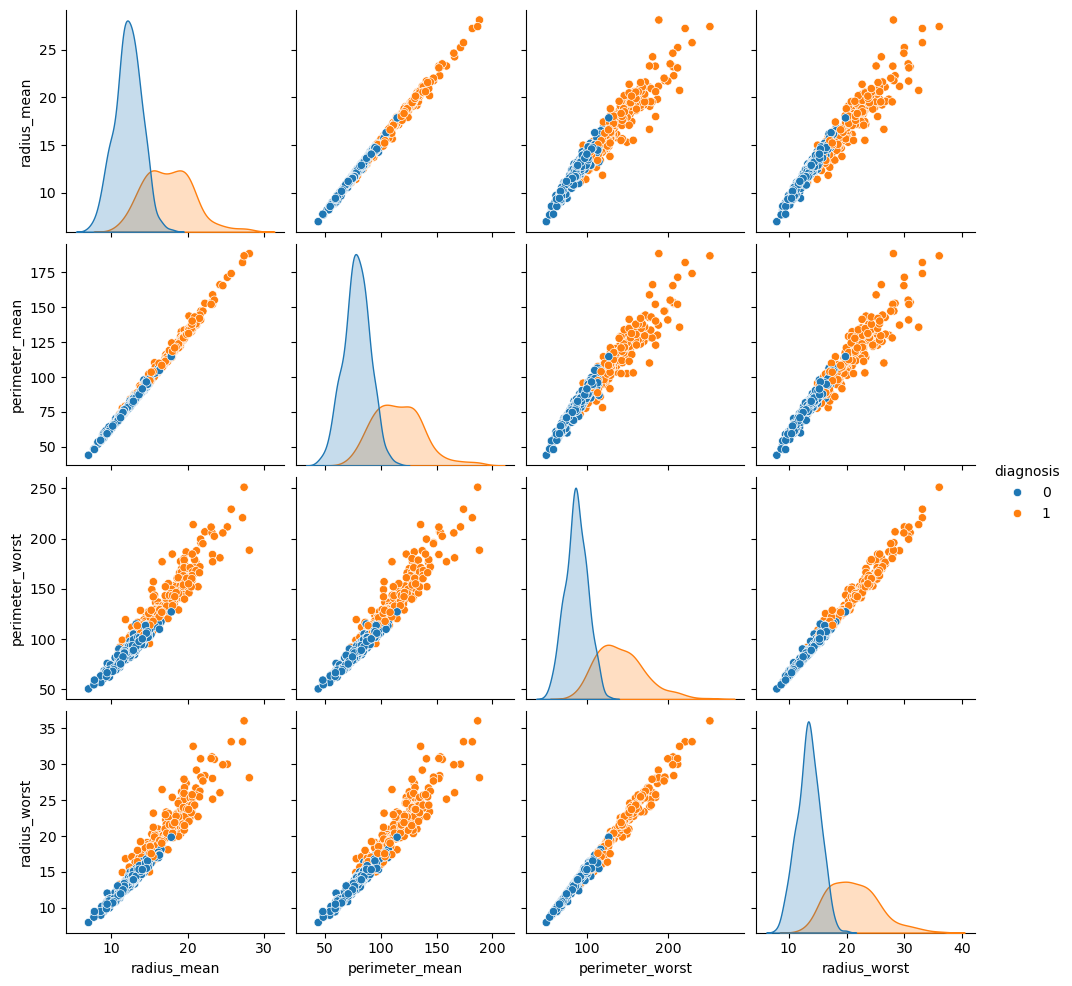

In [20]:
top_pairs_feat = ['radius_mean', 'perimeter_mean', 'perimeter_worst', 'radius_worst','diagnosis']
sns.pairplot(df[top_pairs_feat], hue='diagnosis')

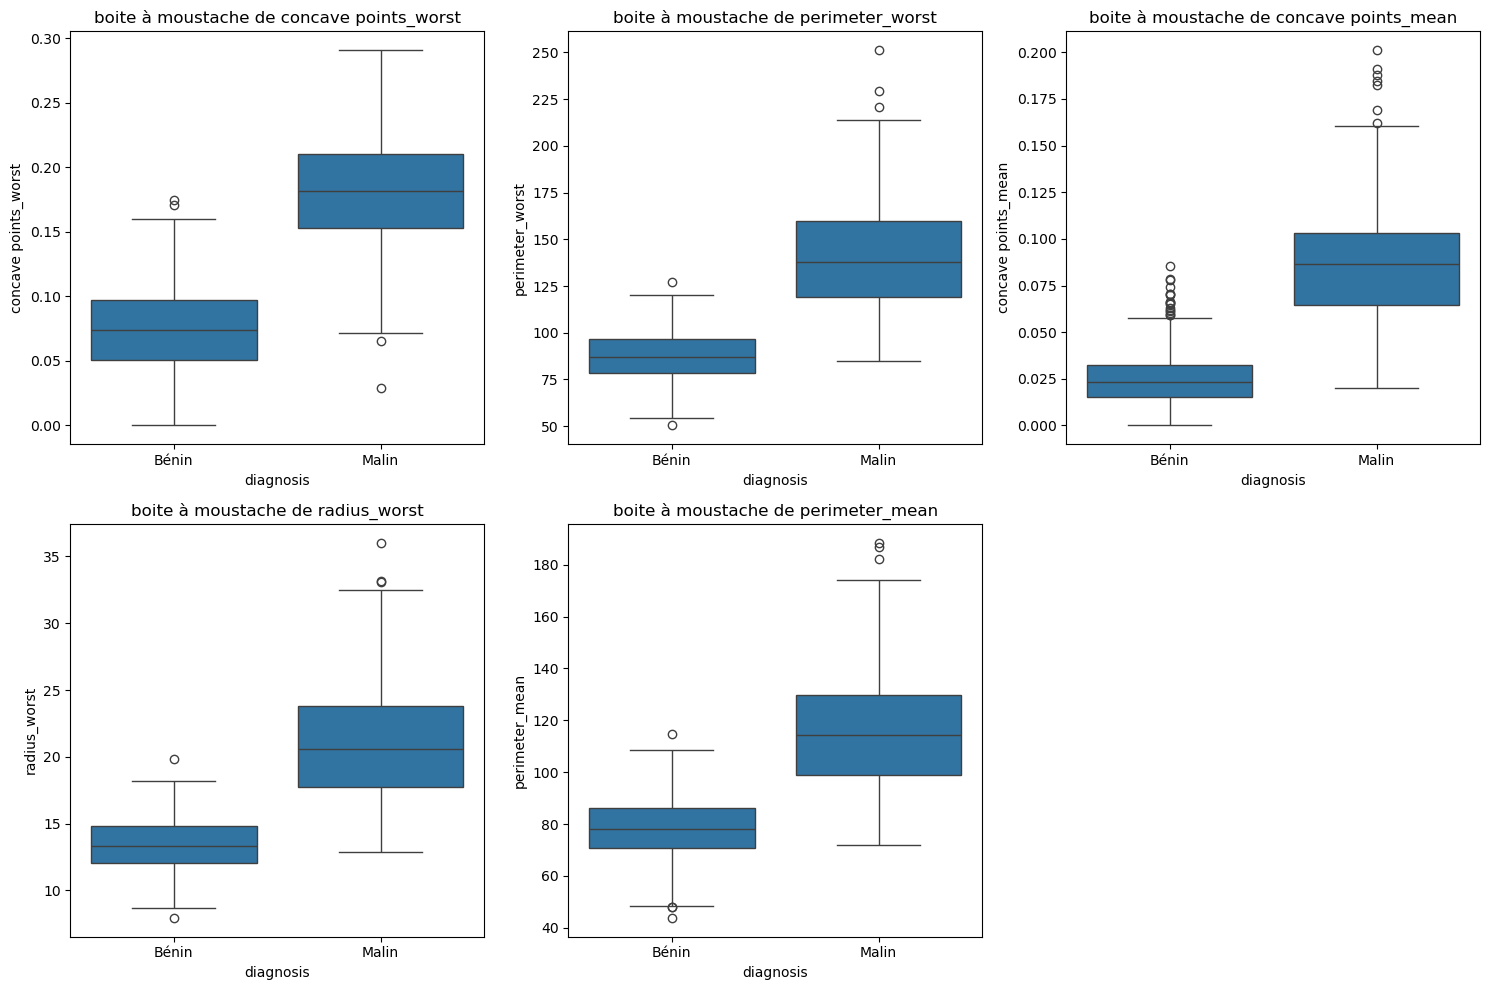

In [21]:

# 7. Analyse par classe (M vs B)
# a) Boxplots comparatifs pour les 5 features les plus discriminantes
top_5_features = top_10_corr_features.index[:5]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3,i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.xticks([0,1], ['Bénin', 'Malin'])
    plt.title(f'boite à moustache de {feature}')
    
plt.tight_layout()
plt.show()

In [22]:

# b) T-tests pour vérifier les différences significatives entre classes

from scipy.stats import ttest_ind

ttest_results = []

for feature in top_5_features:
    benign_values = df[df['diagnosis'] == 0][feature]
    malignant_values = df[df['diagnosis'] == 1][feature]
    t_stat, p_value = ttest_ind(benign_values, malignant_values)
    ttest_results.append({
        'feature': feature,
        't_statistic': t_stat,
        'p_value': p_value
    })
    
    ttest_df = pd.DataFrame(ttest_results)
ttest_df

,feature,t_statistic,p_value
0,concave points_worst,-31.054555,1.969100e-124
1,perimeter_worst,-29.965717,5.771397e-119
2,concave points_mean,-29.354319,7.101150e-116
3,radius_worst,-29.339082,8.482292e-116
4,perimeter_mean,-26.405213,8.436251e-101


In [23]:

# c) Moyennes et écarts-types par classe
class_stats = df.groupby('diagnosis')[top_5_features].agg(['mean', 'std'])
class_stats

concave points_worst           perimeter_worst             \
                          mean       std            mean        std   
diagnosis                                                             
0                     0.074444  0.035797       87.005938  13.527091   
1                     0.182237  0.046308      141.370330  29.457055   

          concave points_mean           radius_worst           perimeter_mean  \
                         mean       std         mean       std           mean   
diagnosis                                                                       
0                    0.025717  0.015909    13.379801  1.981368      78.075406   
1                    0.087990  0.034374    21.134811  4.283569     115.365377   

                      
                 std  
diagnosis             
0          11.807438  
1          21.854653

# Partie 3 : Prétraitement Avancé

In [27]:
# 8. Gestion des outliers
# a) Identifier les outliers avec la règle IQR (1.5×IQR)
def identify_outliers_iqr(data, feature):
    outlier_indices = set()
    for col in feature:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

In [28]:
num_features = df.drop(columns="diagnosis", axis=1).columns
outliers_idx = identify_outliers_iqr(df, num_features)

print(f"Nombre totale d'observations: {len(outliers_idx)}") 

Nombre totale d'observations: 171


# b) Décider de la stratégie : suppression ou imputation
# Ici, nous choisissons l'imputation par clipping(winsorization) 

In [29]:
# c) Appliquer la stratégie choisie
df_outliers_handled = df.copy()

for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_outliers_handled[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [30]:

# 9. Feature engineering
# a) Créer des features de ratio (ex : perimeter/area)
df_fe = df_outliers_handled.copy()

df_fe['perimeter_area_ratio'] = df_fe['perimeter_mean'] / df_fe['area_mean']
df_fe['radius_texture_ratio'] = df_fe['radius_mean']/df_fe['texture_mean']

In [31]:
# b) Créer des interactions entre features importantes
df_fe['radius_area_interaction'] = df_fe['radius_mean'] * df_fe['area_mean']

df_fe['concavity_compactness_interaction'] = df_fe['concavity_mean'] * df_fe['compactness_mean']

In [ ]:
# c) Normaliser les features si nécessaire


In [32]:

# 10. Préparation pour la modélisation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sépation des features et de la cible
features = df_fe.drop(columns='diagnosis')
target = df_fe['diagnosis']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

In [ ]:
# a) Standardiser toutes les features numériques

scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
#xtrain_scaled = scaler.transform(xtrain_scaled)
xtest_scaled = scaler.transform(xtest)

xtrain_scaled = pd.DataFrame(xtrain_scaled, columns=features.columns)
xtest_scaled = pd.DataFrame(xtest_scaled, columns=features.columns)

In [ ]:
# b) Split train/test (80/20) avec stratification
# déjà fait ci-dessus

In [34]:
# c) Sauvegarder les datasets préparés
xtrain_scaled.to_csv('xtrain_prepared.csv', index=False)
xtest_scaled.to_csv('xtest_prepared.csv', index=False)
ytrain.to_csv('ytrain_prepared.csv', index=False)
ytest.to_csv('ytest_prepared.csv', index=False)

In [35]:

# 11. Analyse multicollinéarité
# a) Identifier les paires de features fortement corrélées (corr > 0.9)
corr_matrix = xtrain_scaled.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [36]:
high_corr_df = (
    upper_triangle
    .stack()
    .reset_index()
)

high_corr_df.columns = ['Feature_1', 'Feature_2', 'Correlation']

high_corr_df = high_corr_df[high_corr_df['Correlation'] > 0.9]

In [37]:

high_corr_df.sort_values(by='Correlation', ascending=False)

,Feature_1,Feature_2,Correlation
1,radius_mean,perimeter_mean,0.997616
2,radius_mean,area_mean,0.994164
471,radius_worst,perimeter_worst,0.993693
472,radius_worst,area_worst,0.993155
124,area_mean,radius_area_interaction,0.992499
65,perimeter_mean,area_mean,0.992038
495,perimeter_worst,area_worst,0.986096
31,radius_mean,radius_area_interaction,0.979043
94,perimeter_mean,radius_area_interaction,0.978495
82,perimeter_mean,radius_worst,0.975256


In [ ]:
# multi view learning 
# b) Proposer une sélection de features pour éviter la redondance


---

##  Partie 4 : Questions d’Analyse  


Les questions suivantes doivent être traitées **dans un rapport écrit**, en s’appuyant sur les analyses statistiques et les visualisations réalisées précédemment.

---

###  Distribution des données

1. Quelle est la proportion de tumeurs **malignes (M)** par rapport aux tumeurs **bénignes (B)** ?
2. Les classes sont-elles **équilibrées** ?
3. Quel est l’impact potentiel de cette distribution sur la **performance des modèles de classification** ?

---

###  Caractéristiques discriminantes

4. Quelles sont les **trois (03) variables** les plus **corrélées** avec le diagnostic ?
5. Comment ces caractéristiques **diffèrent-elles entre les deux classes** (maligne vs bénigne) ?
   - Analyse statistique
   - Analyse visuelle (boxplots, violins, distributions)

---

###  Problèmes identifiés

6. Observe-t-on la présence d’**outliers** susceptibles d’affecter la modélisation ?
   - Comment ont-ils été identifiés ?
   - Quelle stratégie de gestion avez-vous adoptée (suppression, transformation, conservation) ?

7. Existe-t-il une **multicolinéarité** entre certaines variables ?
   - Comment l’avez-vous détectée ?
   - Quelle solution proposez-vous (sélection de variables, PCA, régularisation, etc.) ?

---

###  Préparation des données

8. Pourquoi est-il nécessaire de **standardiser** les variables pour ce dataset ?
9. Quel impact le **déséquilibre des classes** peut-il avoir sur :
   - l’apprentissage du modèle ?
   - les métriques d’évaluation ?

---

##  Livrables attendus

- ✅ **Notebook Jupyter complet**, contenant :
  - le code Python
  - des commentaires explicatifs
  - des visualisations interprétées

- ✅ **Dataset nettoyé** : `breast_cancer_clean.csv`

- ✅ **Rapport PDF** (maximum **3 pages**) comprenant :
  - les réponses argumentées aux questions
  - des graphiques intégrés et commentés

- ✅ **Visualisations claires, lisibles et annotées**

---

 *Tout travail devra être structuré, justifié et présenté de manière professionnelle.*
